In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36454259456819194


In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0761660873408903


In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.794224707802


In [9]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36450776610378255 1.075652489604059 3431.797438360455


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3500961358516934 1.1215989919359237 3018.960674449938


In [13]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [14]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039489030742983405 3.4568091949097535 301.3455510507619
0.36450776610378255 1.075652489604059 3431.797438360455


In [15]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.35416642754504835 1.1382306445993162 1194.951986504888
0.36704188760608253 1.0984932613776763 1167.5309516804


<function matplotlib.pyplot.show(*args, **kw)>

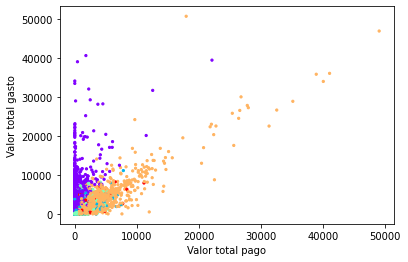

In [18]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

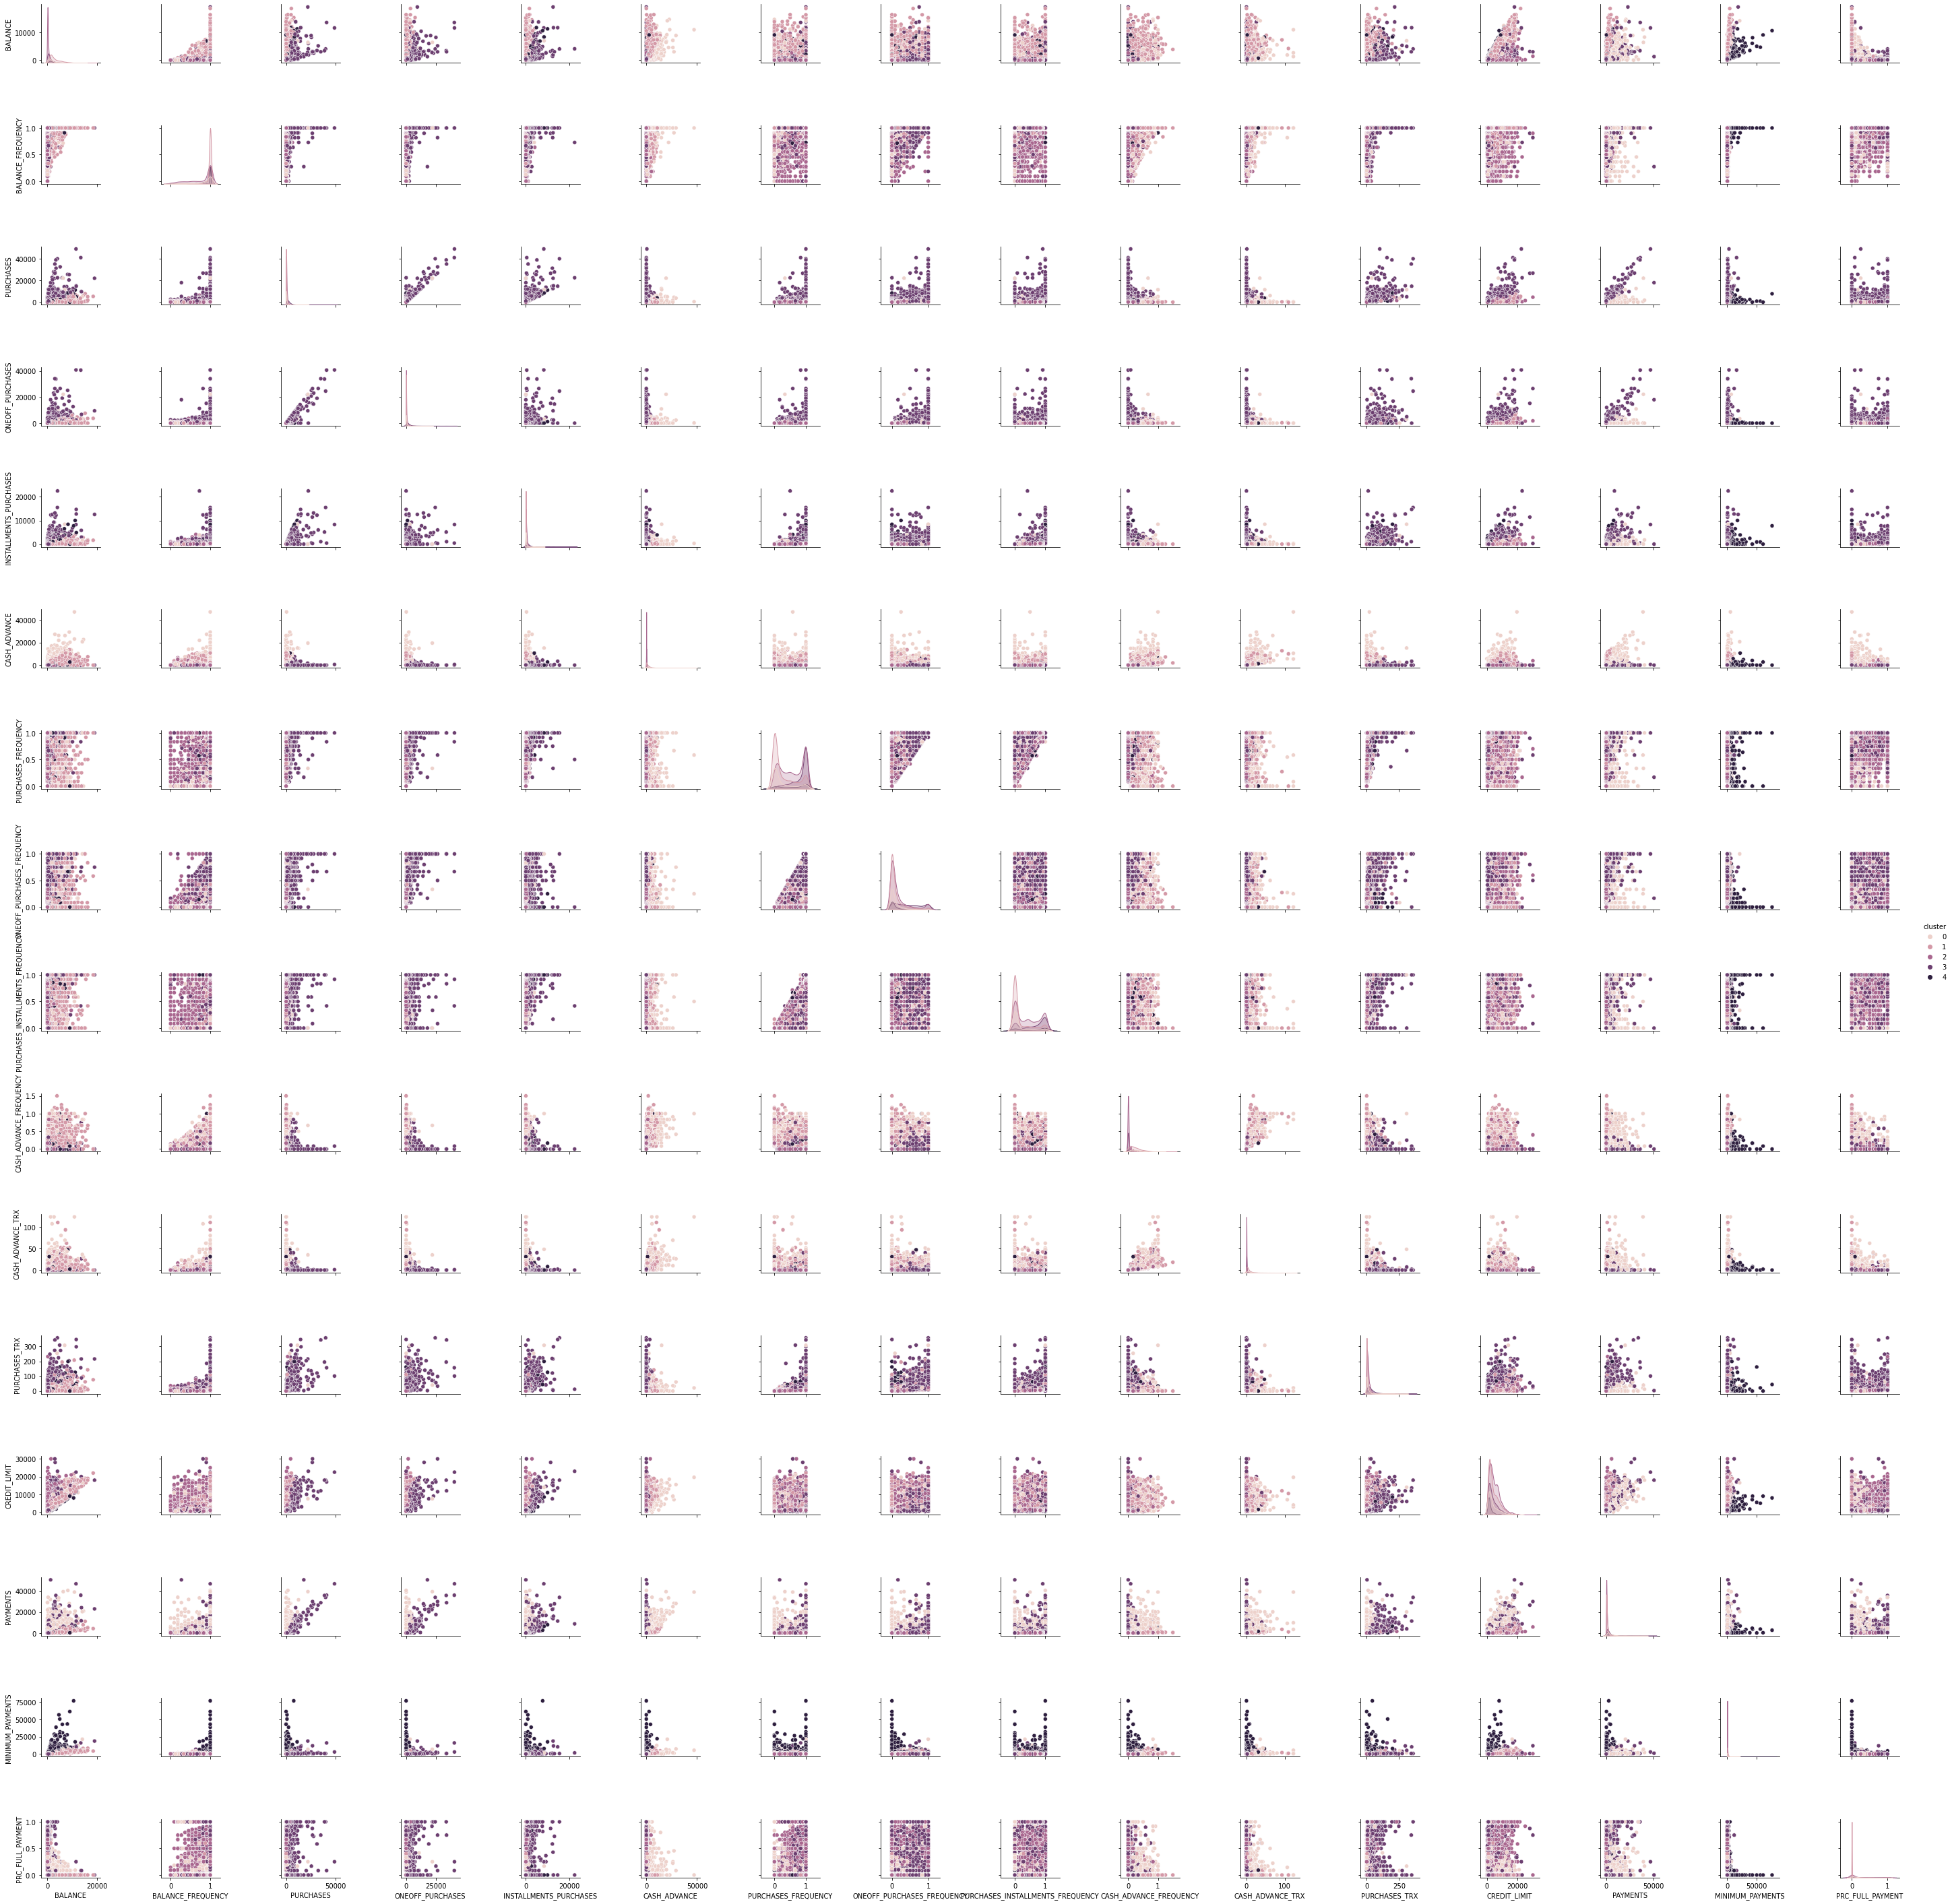

In [19]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

In [20]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1075.0  1794.243689  1980.861978   0.000000   507.620537   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        3280.0   443.746756   846.398201   0.000000    23.365333   
3        1535.0  1142.229612  1665.393296   0.000000   212.073923   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2310.842870  14581.459140            1075.0  0.862516   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2          82.941478   410.126095   9630.367575            3280.0  0.774389   
3         553.534453  1370.143507  19043.138560            1535.0  0.928174   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       883.800031  21235.065300           1075.0  0.117289   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       248.733727   4483.503862           3280.0  0.246806   
3        ...       524.475206  18621.013310           1535.0  0.278458   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186635  0.0  0.0  0.083333  0.142857  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.346748  0.0  0.0  0.000000  0.444444  1.0  
3        0.367223  0.0  0.0  0.083333  0.545455  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [22]:
centroids = kmeans.cluster_centers_
centroids

array([[2.34985202e-01, 2.16116336e-04, 6.10950792e-02, 3.48777793e-02,
        2.62224951e-02, 3.99528545e-01, 5.27944137e-05, 2.06576196e-05,
        3.52637889e-05, 6.53253087e-05, 1.56775733e-03, 1.13055837e-03,
        5.35698250e-01, 5.97708442e-01, 1.04147601e-01, 2.76781866e-05],
       [5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.36686718e-05,
        1.40328311e-04, 7.92341768e-06, 1.23962309e-04, 2.86381277e-03,
        9.43564102e-01, 1.53799817e-01, 5.68529799e-02, 7.61493366e-05],
       [1.59954746e-01, 2.45570204e-04, 4.38918210e-01, 2.57249491e-01,
        1.81840788e-01, 2.53005800e-02, 2.04597888e-04, 8.908

In [24]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], centroids[:, i].var())

BALANCE 0.022412690558405567
BALANCE_FREQUENCY 4.6233689852816985e-10
PURCHASES 0.01967283761793908
ONEOFF_PURCHASES 0.007654574073288232
INSTALLMENTS_PURCHASES 0.003576341324151174
CASH_ADVANCE 0.02251462323929926
PURCHASES_FREQUENCY 3.720358401976918e-09
ONEOFF_PURCHASES_FREQUENCY 6.412785290280982e-10
PURCHASES_INSTALLMENTS_FREQUENCY 2.712187840157838e-09
CASH_ADVANCE_FREQUENCY 6.021775762257412e-10
CASH_ADVANCE_TRX 3.297668089550653e-07
PURCHASES_TRX 3.4248498331642935e-06
CREDIT_LIMIT 0.03597062142740472
PAYMENTS 0.027935957664641548
MINIMUM_PAYMENTS 0.05433313202246509
PRC_FULL_PAYMENT 1.0495098881030968e-09


In [25]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [ ]:
#BALANCE 0.0224
#PURCHASES 0.0196
#CASH_ADVANCE 0.0226
#CREDIT_LIMIT 0.0360
#PAYMENTS 0.0280
#MINIMUM_PAYMENTS 0.0542

In [26]:
dataframe.groupby("cluster") ["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1075.0,1794.243689,1980.861978,0.000000,507.620537,1088.056301,2310.842870,14581.459140
1,2649.0,3037.962543,2478.838161,6.824905,1256.612223,2174.018945,4223.867789,18495.558550
2,3280.0,443.746756,846.398201,0.000000,23.365333,82.941478,410.126095,9630.367575
3,1535.0,1142.229612,1665.393296,0.000000,212.073923,553.534453,1370.143507,19043.138560
4,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850


In [28]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1794.243689   480.988753   3267.584685   3985.740662  4711.029169
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376
2         443.746756   629.249107    141.482978   5130.547795   814.294226
3        1142.229612  3274.143199    179.088533   4095.153193  3036.228833
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911


<ipython-input-28-92754d34d3f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [29]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1794.243689   480.988753   3267.584685   3985.740662  4711.029169   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2         443.746756   629.249107    141.482978   5130.547795   814.294226   
3        1142.229612  3274.143199    179.088533   4095.153193  3036.228833   
4        1987.501586   854.865815    421.129352   2227.737226  1336.238911   

         n_clients  
cluster             
0             1075  
1             2649  
2             3280  
3             1535  
4              411  


<ipython-input-29-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [ ]:
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.

In [31]:
dataframe.groupby("cluster") ["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1075.0,0.117289,0.186635,0.0,0.0,0.083333,0.142857,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
3,1535.0,0.278458,0.367223,0.0,0.0,0.083333,0.545455,1.0
4,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0


In [ ]:
CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.